<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_8/dstep23_geospatial_intro_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Introduction to Geospatial Data: Part 2**

*October 19, 2023*

This notebook will introduce tools for working with geospatial data in python using Zipcodes and MapPLUTO in New York City.

---

#### **Loading and visualizing geospatial data with python**

The core package for working with geospatial data in python is `geopandas`:

In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# -- and now let's access the *shapes* of those zipcodes
zname = "/content/drive/Shareddrives/dstep23/data/geos/nyc/zipcode_shapes/ZIP_CODE_040114.shp"
zshps = gp.read_file(zname)

In [4]:
# -- note the coordinates
zshps.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

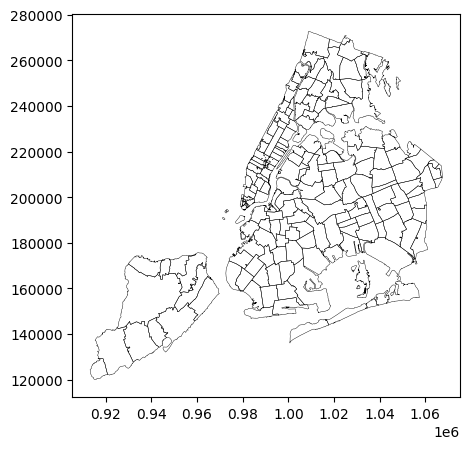

In [10]:
# -- a simple plot
fig, ax = plt.subplots(figsize=(5, 5))
zshps.plot(facecolor="none", lw=0.3, ax=ax)
fig.show()

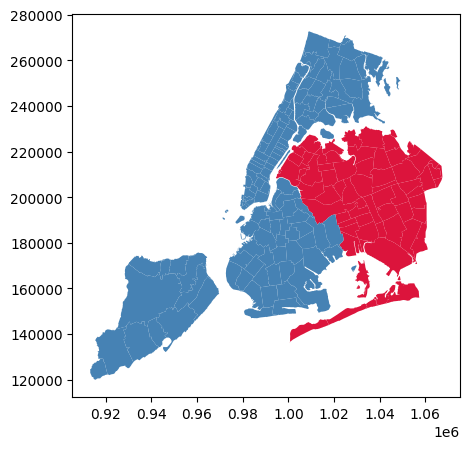

In [6]:
# -- highlight zipcodes in Queens
queens = zshps[zshps["COUNTY"] == "Queens"]
others = zshps[zshps["COUNTY"] != "Queens"]

fig, ax = plt.subplots(figsize=(5, 5))
queens.plot(facecolor="crimson", ax=ax)
others.plot(facecolor="steelblue", ax=ax)
fig.show()

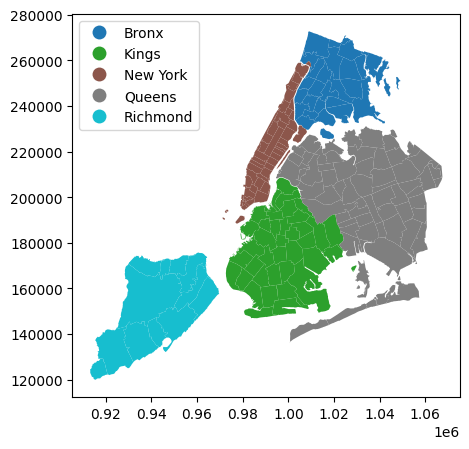

In [7]:
# -- plot categorical variables
fig, ax = plt.subplots(figsize=(5, 5))
zshps.plot("COUNTY", legend=True, legend_kwds={"loc":"upper left"}, ax=ax)
fig.show()

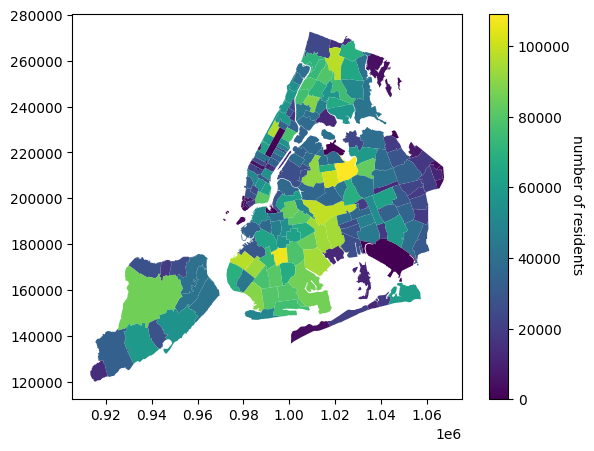

In [8]:
# -- make a color-coded "map" of numerical variables
fig, ax = plt.subplots(figsize=(7, 5))
zshps.plot("POPULATION", cmap="viridis", legend=True, ax=ax)
fig.text(0.9, 0.5, "number of residents", rotation=-90, va="center")
fig.show()

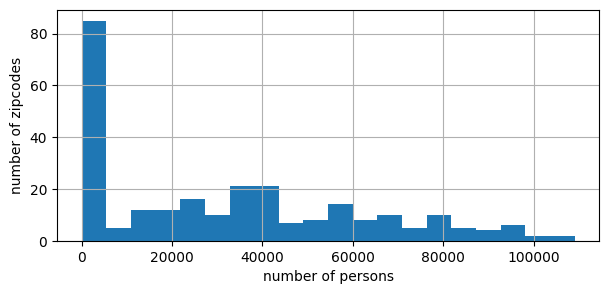

In [9]:
# -- make a histogram of the population values
fig, ax = plt.subplots(figsize=(7, 3))
zshps.hist("POPULATION", bins=20, ax=ax)
ax.set_xlabel("number of persons")
ax.set_ylabel("number of zipcodes")
ax.set_title("")
fig.show()

#### **Accessing and working with values, attributes, and methods in GeoDataFrames**

The values in GeoDataFrames can be accessed and used identically to DataFrames,

In [12]:
# -- display the "POPULATION" column
zshps["POPULATION"]

pandas.core.series.Series

In [13]:
# -- calculate summary statistics of the various numerical columns
zshps.describe()

,POPULATION,AREA,SHAPE_AREA,SHAPE_LEN
count,263.000000,2.630000e+02,263.0,263.0
mean,31933.863118,3.181655e+07,0.0,0.0
std,29907.574253,4.462938e+07,0.0,0.0
min,0.000000,3.154825e+03,0.0,0.0
25%,49.500000,9.643231e+05,0.0,0.0
50%,27985.000000,2.192755e+07,0.0,0.0
75%,54445.000000,4.593557e+07,0.0,0.0
max,109069.000000,4.739857e+08,0.0,0.0


Many of the attributes and methods of GeoDataFrames are the same as DataFrames,

In [16]:
# -- print the columns attribute
zshps.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')

In [24]:
# -- access the 5th row
zshps.iloc[5]

ZIPCODE                                                   11226
BLDGZIP                                                       0
PO_NAME                                                Brooklyn
POPULATION                                             106132.0
AREA                                            39408598.279012
STATE                                                        NY
COUNTY                                                    Kings
ST_FIPS                                                      36
CTY_FIPS                                                    047
URL                                        http://www.usps.com/
SHAPE_AREA                                                  0.0
SHAPE_LEN                                                   0.0
geometry      POLYGON ((994821.4729396403 177865.7178093046,...
Name: 5, dtype: object

In [20]:
# -- print the unique values of categorical variables
zshps["PO_NAME"].unique()

array(['Jamaica', 'Brooklyn', 'Bronx', 'New York', 'Whitestone',
       'Central Park', 'College Point', 'Bayside', 'Astoria',
       'Little Neck', 'Flushing', 'East Elmhurst', 'Corona', 'Woodside',
       'Long Island City', 'Oakland Gardens', 'Floral Park', 'Sunnyside',
       'Maspeth', 'Ridgewood', 'Saint Albans', 'Cambria Heights',
       'Springfield Gardens', 'Rosedale', 'South Ozone Park',
       'Ozone Park', 'Staten Island', 'Far Rockaway', 'Inwood', 'Arverne',
       'Rockaway Park', 'Breezy Point', 'Jackson Heights', 'Glen Oaks',
       'New Hyde Park', 'Bellerose', 'Fresh Meadows', 'Forest Hills',
       'Queens Village', 'Rego Park', 'Hollis', 'Middle Village',
       'Kew Gardens', 'Richmond Hill', 'Woodhaven', 'South Richmond Hill',
       'Elmhurst', 'Howard Beach'], dtype=object)

but some are **unique** to GeoDataFrames,

In [29]:
# -- print the centroid attribute of the GeoDataFrame
print(zshps.centroid[0])
print(zshps.centroid[0].x)
print(zshps.centroid[0].y)

POINT (1040696.262135346 185580.22191404054)
1040696.262135346
185580.22191404054


In [30]:
# -- print the area attribute (but note this data set contains the same info in a column)
zshps.area

0      2.269930e+07
1      2.963100e+07
2      4.197210e+07
3      2.369863e+07
4      3.686880e+07
           ...     
258    5.346328e+07
259    3.497516e+06
260    1.777221e+07
261    2.103487e+04
262    1.263929e+05
Length: 263, dtype: float64

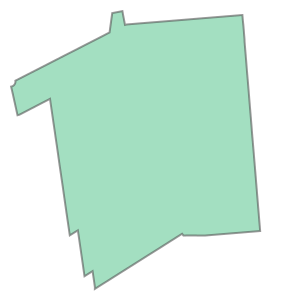

In [31]:
# -- display just the geometry of a single row
geo5 = zshps["geometry"].iloc[5]

geo5

In [32]:
type(geo5)

shapely.geometry.polygon.Polygon

In [33]:
# -- for each zipcode, find the distance to the 5th zipcode using the distance method
zshps.distance(geo5)

0      40397.718896
1       3050.954645
2       5017.304271
3          0.000000
4          0.000000
           ...     
258    32495.277360
259    28259.362866
260    15056.730293
261    41077.215292
262    35265.824509
Length: 263, dtype: float64

In [34]:
zshps.iloc[:10].distance(geo5)

0    40397.718896
1     3050.954645
2     5017.304271
3        0.000000
4        0.000000
5        0.000000
6     4312.962221
7        0.000000
8        0.000000
9     3932.014977
dtype: float64

Let's demonstrate this last one with a plot,

In [35]:
# -- add the distance to the 5th zipcode as a column in the GeoDataFrame
zshps["dist5"] = zshps.distance(geo5)

In [36]:
# -- set the zipcode number
zcode5 = zshps["ZIPCOD"].iloc[5]

# -- make a choropleth color-coded by that distance
fig, ax = plt.subplots(figsize=(9, 7))


# -- add an X where the 5th zipcode is
geo5x = geo5.centroid.x
geo5y = geo5.centroid.y
ax.scatter([geo5x], [geo5y], marker="*", s=200, color="r")

fig.show()

SyntaxError: ignored

#### **Coordinate transforms and matching**

Let's load the MapPLUTO data for Manhattan,

In [37]:
# -- load MapPLUTO data
mname = "/content/drive/Shareddrives/dstep23/data/nycdcp/mappluto/mn/MapPLUTO_MN.shp"
mnpl = gp.read_file(mname)

In [ ]:
# -- display the MapPLUTO data
mnpl

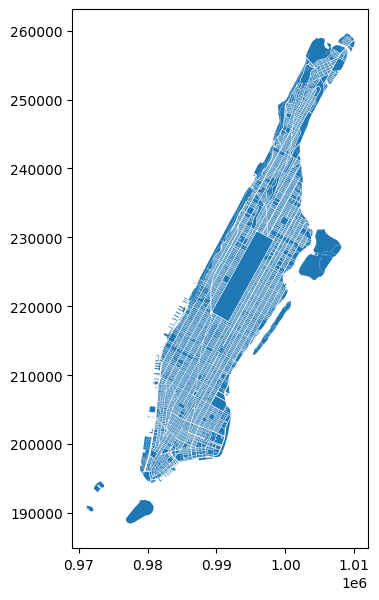

In [39]:
# -- plot the shapes
fig, ax = plt.subplots(figsize=(5,7))
mnpl.plot(ax=ax)
fig.show()

Let's say we wanted to zoom in on Flatiron building which we know is at a latitude/longitude of $(40.740947^\circ, -73.989645^\circ)$

In [40]:
# -- convert to decimal degrees
mnpl_deg = mnpl.to_crs("epsg:4326")

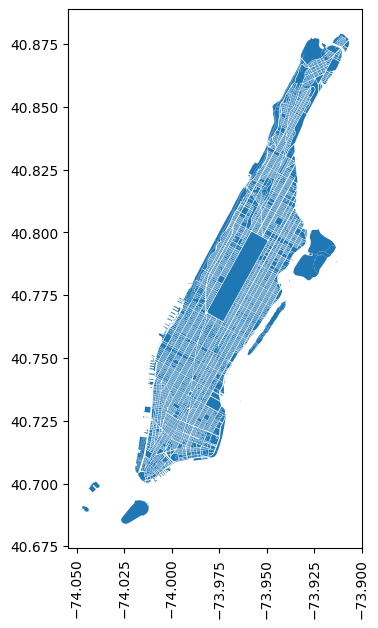

In [44]:
# -- plot the shapes in the EPSG:4326 coordinate system
fig, ax = plt.subplots(figsize=(5,7))
mnpl_deg.plot(ax=ax)
ax.xaxis.set_tick_params(rotation=90)
fig.show()

In [ ]:
# -- zoom in on the Flatiron building
cen = (-73.989645, 40.740947)
wid = 0.005
xlim =
ylim =



#### **Grouping and merging GeoDataFrames**

Let's try to visualize an answer to the following Urban Planning-based policy question:

***What is the average number of floors of buildings in a given NYC zipcode?***